# Predicting House Prices using the King County Housing Dataset
### By: Olalekan Hammed (Stephen)

In [74]:
# Google colab specific code
from google.colab import drive
drive.mount('/content/drive')
from google.colab import data_table
data_table.enable_dataframe_formatter()
#data_table.disable_dataframe_formatter()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


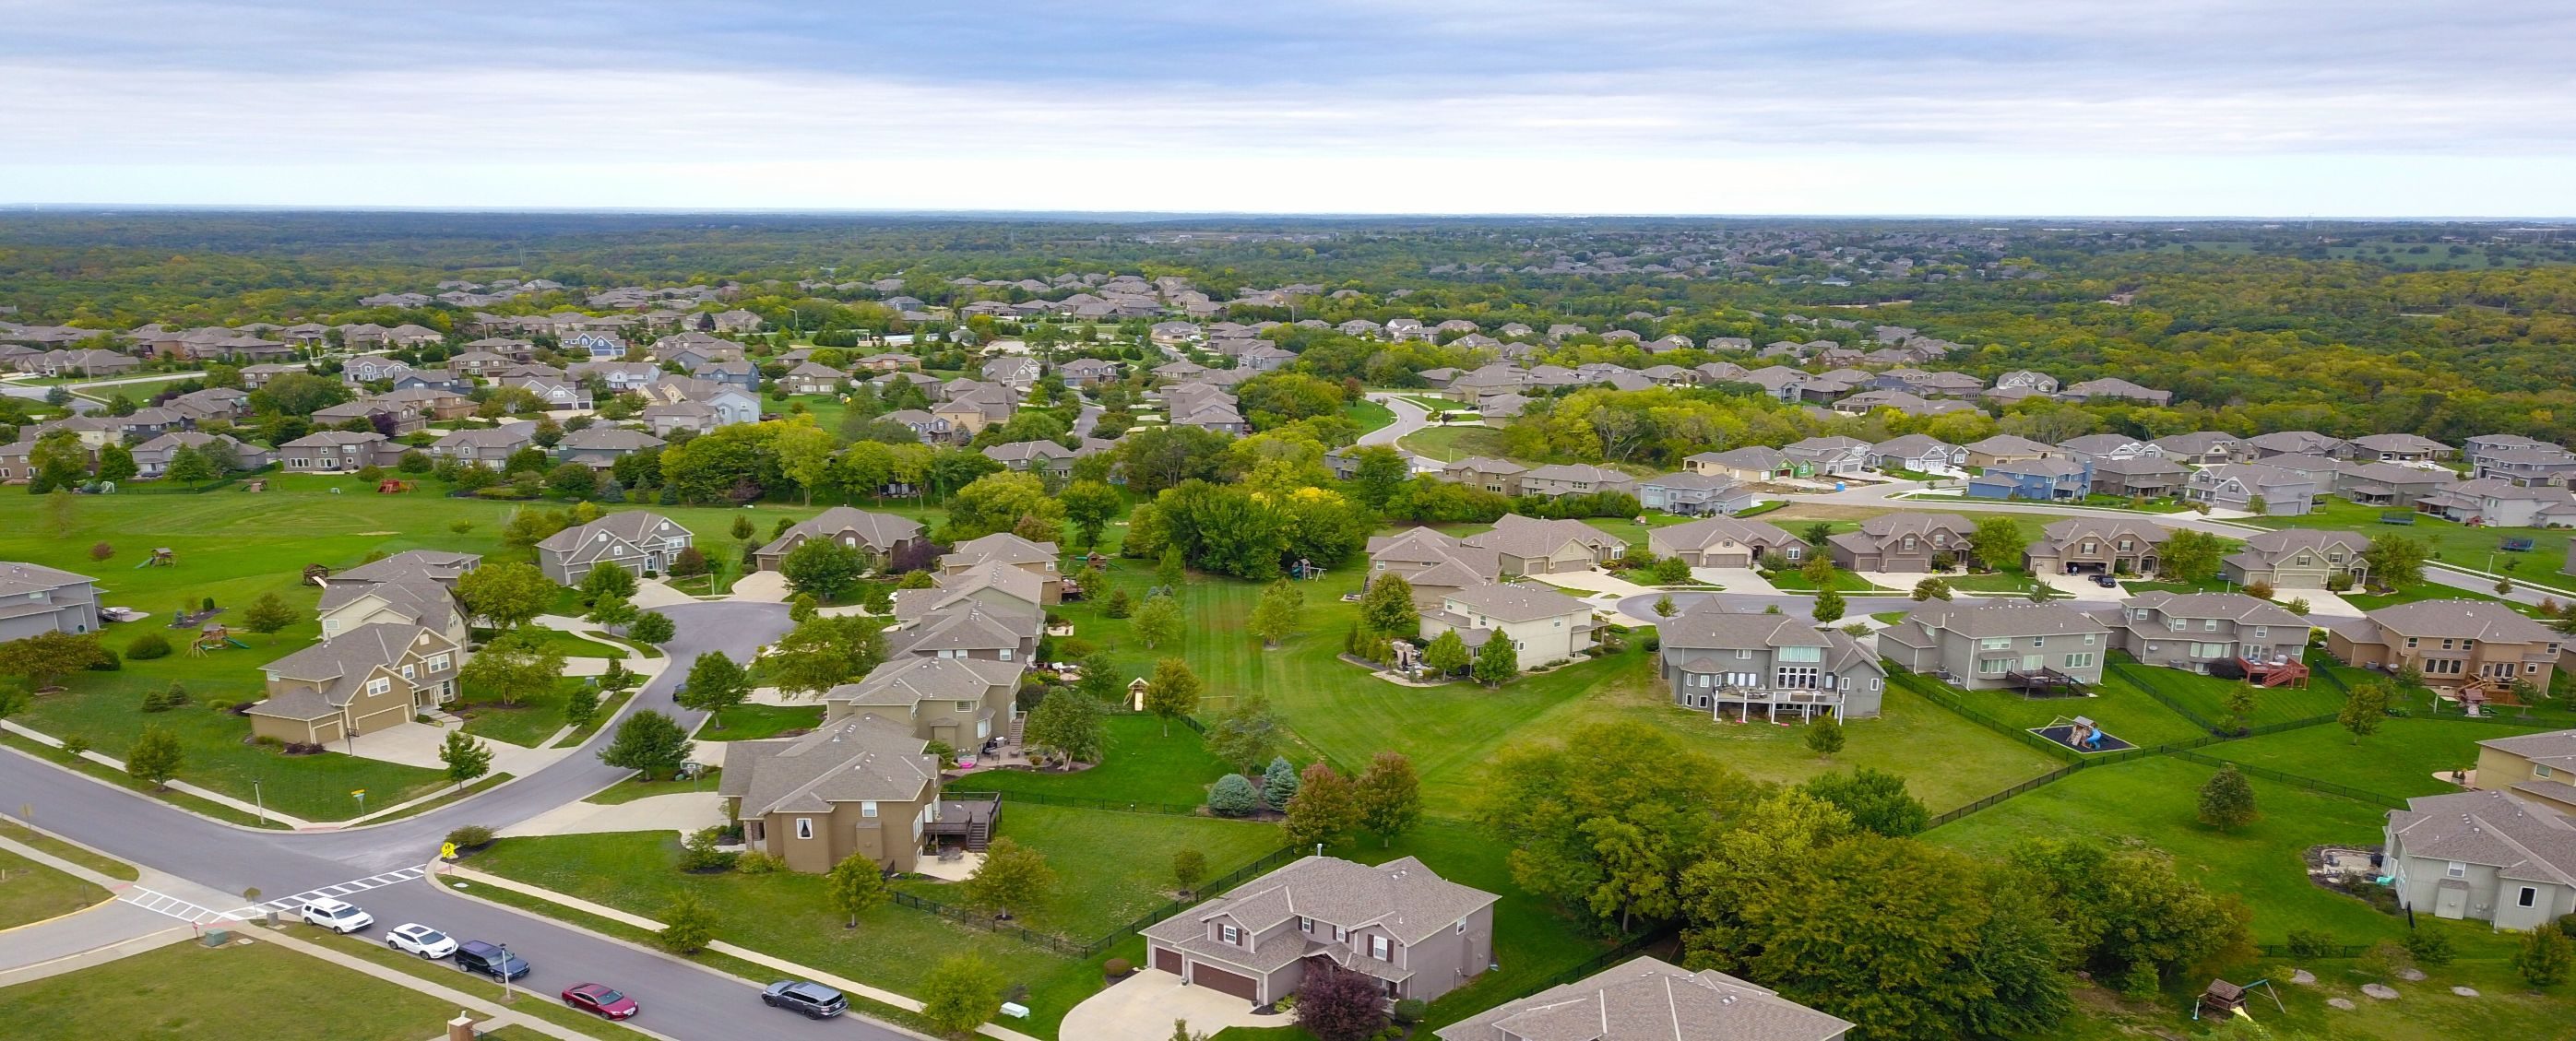

## Business Understanding
- The objective of this project is to model real estate prices in Kings County, 
Washington, USA. It is my intention that the model will be able to accurately predict housing prices based on a number of property variables provided within the dataset with which the model is built. 
- The expectation is that the model can be used by Real Estate investors and stakeholders operating in the Kings County area as a tool to guild financial and business decisions.

## Data Understanding
- We will be using the Kings County Housing dataset, kc_house_dataas provided by Flatiron School. The dataset contains 25 columns with inforamation about the size, location, condition, and other features of houses in King County. 
- One of the column is of the prices of the house and that will represent the ***dependent*** or ***target*** variable, that is, the column which value is to be predicted based on the other columns which are referred to as the ***independent*** or ***predictor*** variables. A full description of the dataset's columns can be found below:

- *id - unique identified for a house*

***Continous Variables***
- *price - sale price which is prediction target*
- *sqft_living - footage of the home*
- *sqft_lot - footage of the lot*
- *sqft_above - square footage of house apart from basement*
- *sqft_basement - square footage of the basement*
- *sqft_garage -  square footage of garage space*
- *sqft_patio - Square footage of outdoor porch or deck space*

**Categorical Variables**

*Intriniscially continous, but limited range so makes sense to categorize:*
- *bedrooms - of Bedrooms/House*
- *bathrooms - of bathrooms/bedrooms*
- *floors - floors (levels) in house*

*Strictly categorical:*
- *waterfront - whether the house is on a waterfront*
- *greenbelt - whether the house is adjacent to a green belt*     
- *nuisance  - whether the house has traffic noise or other recorded nuisances*
- *view - quality of view from house*
- *condition - how good the condition is ( Overall )*
- *grade - overall grade given to the housing unit, based on King County grading system*
- *heat_source  -  heat source for the house*
- *sewer_system -  sewer system for the house*

**Dates**
- *date - house was sold*
- *yr_built - year the house was built*
- *yr_renovated - year when house was renovated*

**Nominal**
- *address - the street address*
- *lat - Latitude coordinate*
- *long - Longitude coordinate*

## Data Preparation

### Loading the Data

In [75]:
#load required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import statsmodels.api as sm
import seaborn as sns

In [76]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Flatiron/Phase 4/Project/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [77]:
data.shape

(30155, 25)

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

- The dataframe contains 25 columns and 30,155 rows. 
- Since **price** is the target variable and **id** is irrelevant, we have 23 features to construct the model.
- From this information, I can see that variables *heat_source* and *sewer_system* have null value
- In the Data Cleaning section below, I examine the proportions, get the value count, treat the missing values in each of the columns and  I drop the id column amongst other tasks.

### Data Exploration

In [79]:
# get proportion of missing values
for column in data.columns:
  na_percent = (sum(data[column].isnull())/len(data[column])) * 100 
  print(column, round(na_percent, 2))

id 0.0
date 0.0
price 0.0
bedrooms 0.0
bathrooms 0.0
sqft_living 0.0
sqft_lot 0.0
floors 0.0
waterfront 0.0
greenbelt 0.0
nuisance 0.0
view 0.0
condition 0.0
grade 0.0
heat_source 0.11
sewer_system 0.05
sqft_above 0.0
sqft_basement 0.0
sqft_garage 0.0
sqft_patio 0.0
yr_built 0.0
yr_renovated 0.0
address 0.0
lat 0.0
long 0.0


In [80]:
# get descriptive statistics of df
round(data.describe(), 2)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long
count,3.015500e+04,30155.00,30155.00,30155.00,30155.00,30155.0,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00,30155.00
mean,4.538104e+09,1108535.84,3.41,2.33,2112.42,16723.6,1.54,1809.83,476.04,330.21,217.41,1975.16,90.92,47.33,-121.32
std,2.882587e+09,896385.66,0.98,0.89,974.04,60382.6,0.57,878.31,579.63,285.77,245.30,32.07,416.47,1.43,5.73
min,1.000055e+06,27360.00,0.00,0.00,3.00,402.0,1.00,2.00,0.00,0.00,0.00,1900.00,0.00,21.27,-157.79
25%,2.064175e+09,648000.00,3.00,2.00,1420.00,4850.0,1.00,1180.00,0.00,0.00,40.00,1953.00,0.00,47.41,-122.33
50%,3.874011e+09,860000.00,3.00,2.50,1920.00,7480.0,1.50,1560.00,0.00,400.00,150.00,1977.00,0.00,47.55,-122.23
75%,7.287100e+09,1300000.00,4.00,3.00,2619.50,10579.0,2.00,2270.00,940.00,510.00,320.00,2003.00,0.00,47.67,-122.12
max,9.904000e+09,30750000.00,13.00,10.50,15360.00,3253932.0,4.00,12660.00,8020.00,3580.00,4370.00,2022.00,2022.00,64.82,-70.07


### Data Cleaning



```
# Convert date column to datetime
```



In [151]:
# Convert date sold column to datetime in case we want to work with later 
data['date']=pd.to_datetime(data['date'])
data['yr_built']=pd.to_datetime(data['yr_built'])
data['yr_renovated']=pd.to_datetime(data['yr_renovated'])

The heat_source and sewer_system variables have missing values. Let's inspect the value counts for each of these columns.

In [81]:
data['heat_source'].value_counts()

Gas                  20583
Electricity           6465
Oil                   2899
Gas/Solar               93
Electricity/Solar       59
Other                   20
Oil/Solar                4
Name: heat_source, dtype: int64

In [82]:
print(data.heat_source.isna().sum())

32


In [83]:
data['sewer_system'].value_counts()

PUBLIC                25777
PRIVATE                4355
PRIVATE RESTRICTED        6
PUBLIC RESTRICTED         3
Name: sewer_system, dtype: int64

In [84]:
print(data.sewer_system.isna().sum())

14


Because **heat_source** and **sewer_system** have just 32 and 14 missing values respectively, and because they are categorical variables I decide to replace the missing values with the missng values with **Gas** and **PUBLIC** being the categories with the highest number of entries respectively.

In [85]:
# replace missing values for heat_source
data['heat_source'].fillna('Gas', inplace=True)

In [86]:
# replace missing values for sewer_system
data['sewer_system'].fillna('PUBLIC', inplace=True)

In [87]:
# confirm that missing values have been taken care of
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
greenbelt        0
nuisance         0
view             0
condition        0
grade            0
heat_source      0
sewer_system     0
sqft_above       0
sqft_basement    0
sqft_garage      0
sqft_patio       0
yr_built         0
yr_renovated     0
address          0
lat              0
long             0
dtype: int64

In [88]:
# checking uniqueness of the id column
data.shape[0] - data.id.nunique()

1

Since there just one duplicate in the **id** columns, which indicates perhaps that the particular buildng was sold twice or perhaps to data entry error, we can ignore and go ahead to remove the column as it unique identifier with relationship with the property as a feature.

In [89]:
# drop id column
data.drop(['id'], axis=1, inplace=True)

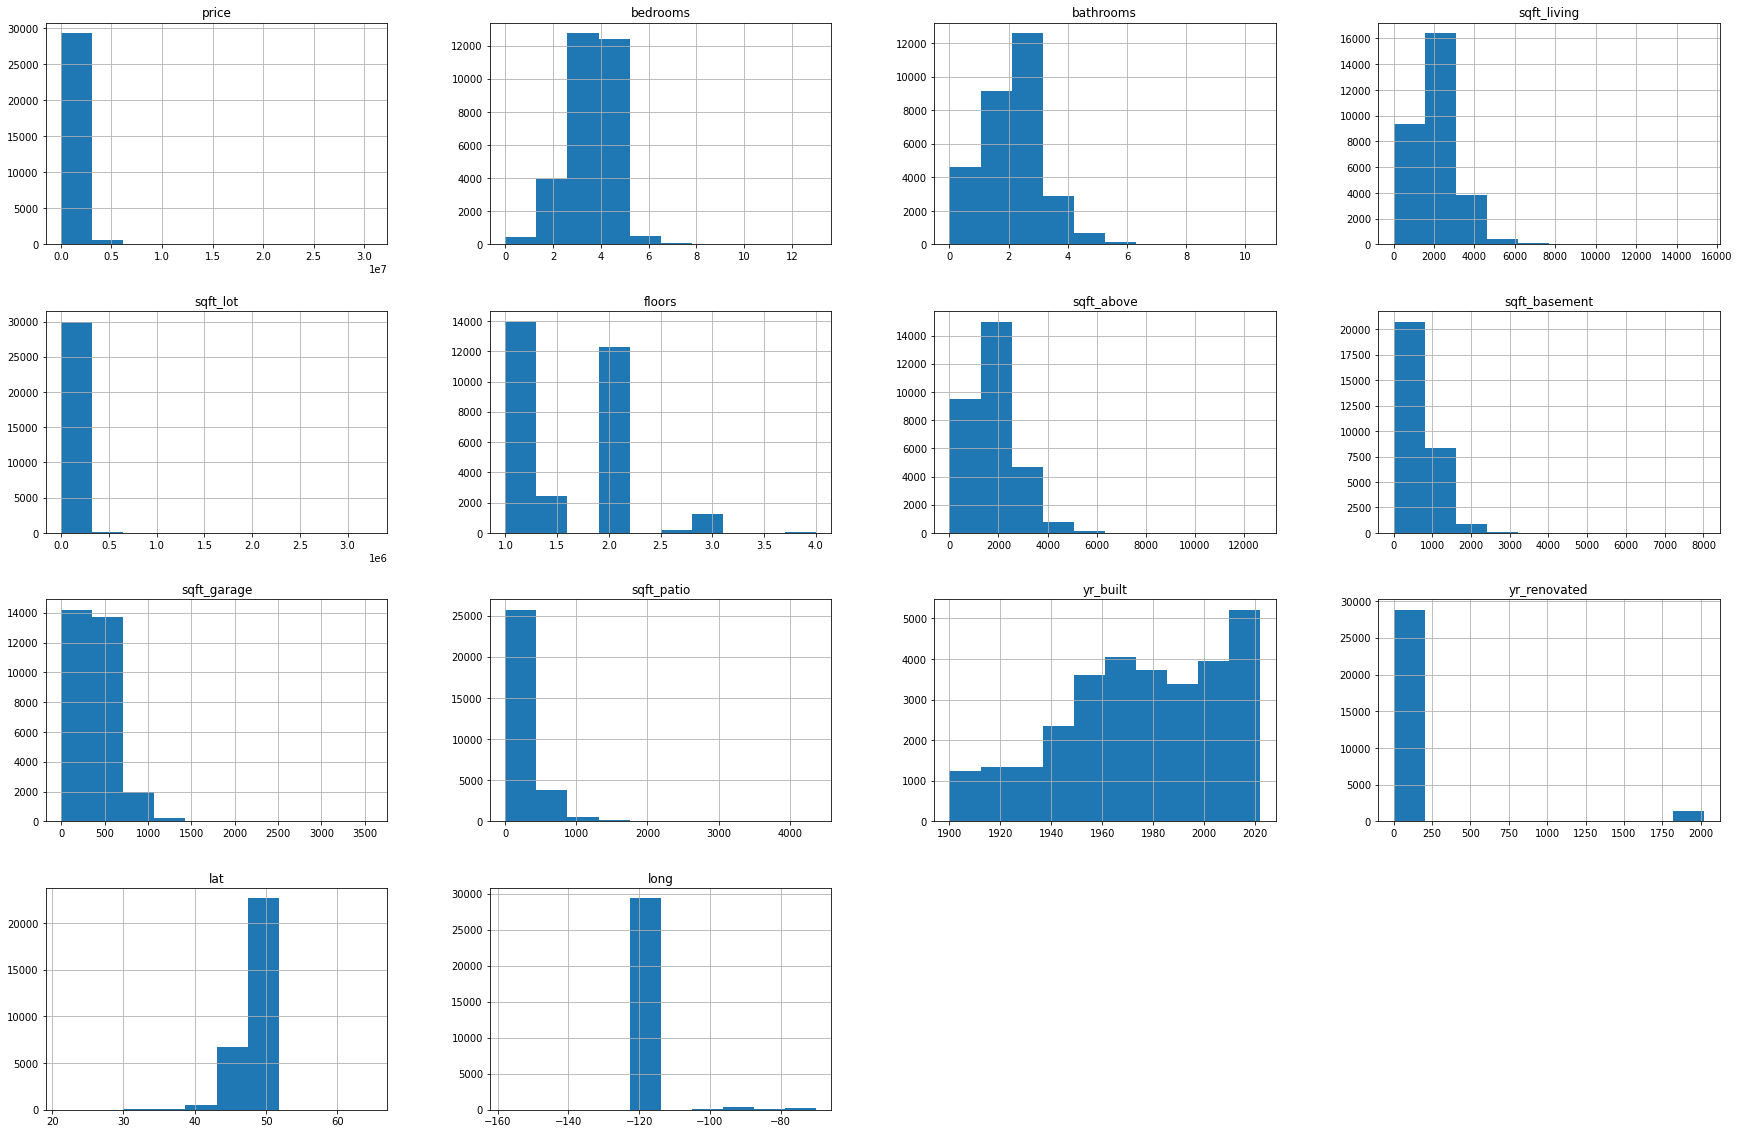

In [90]:
# look at histograms distributions
data.hist(figsize=(30,20));
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/histo_eda.png')

Preliminary observations from looking at histograms
- variables do not follow a normal distribution 
- price has a positive skewness with possible outliers
- bedrooms are mostly between 3 and 5 
- most houses have 3 bathrooms
- all sqft because most distributions are positively skewed with possible extreme outliers
- most houses have 1 floor
- most house were built between 2010 and 2020 but construction actually took off just before the 1940's 
- most homes have NOT been renovated given 0 - 200 as the renovated year

### Dealing with Outliers

In [91]:
# look at value_counts to identfy any outliers
for col in data.columns:
    print('\n')
    print(col, data[col].value_counts())



date 7/1/2021      196
8/2/2021      186
6/23/2021     176
7/6/2021      176
6/16/2021     174
             ... 
6/9/2022        1
1/16/2022       1
12/25/2021      1
12/5/2021       1
12/26/2021      1
Name: date, Length: 365, dtype: int64


price 650000.0     346
750000.0     307
800000.0     299
850000.0     296
600000.0     295
            ... 
728350.0       1
344000.0       1
1211500.0      1
2346000.0      1
656500.0       1
Name: price, Length: 5202, dtype: int64


bedrooms 3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
11        1
13        1
Name: bedrooms, dtype: int64


bathrooms 2.5     8475
2.0     7349
1.0     4576
3.0     4117
3.5     2266
1.5     1808
4.0      645
4.5      533
5.0      145
5.5      104
6.0       45
0.0       31
6.5       25
7.0       12
7.5       12
0.5        5
9.5        2
8.0        2
10.5       1
10.0       1
8.5        1
Name: bathrooms, dtype: int64


sqft_livi

- In dealing with outliers, I will focuse on two variables **bedroom** and **bathroom** because outliers in these variables such as for instance a 13-bedroom or 10-bathroom home is probably a much more larger property that would be best analyzed separate from single-family homes of between 1 to 5 bedroom and 1 to 5 bathrooms which form the majority of the dataset.

- Hence, I'll use the 1.5 IQR rule and descriptve statistics of the columns to determine and remove the outliers

- IQR stands for Inter-Quartile Rang also called the midspread or middle 50%, or technically H-spread, is a measure of statistical dispersion, being equal to the difference between 75th and 25th percentiles, or between upper and lower quartiles, IQR = Q₃ − Q₁. *Source: Wikipedia*

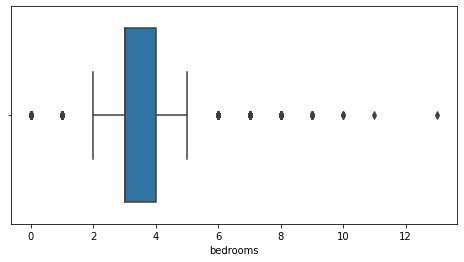

In [92]:
#visualising bedrooms spread
fig = plt.figure(figsize=(8,4))
sns.boxplot(x=data['bedrooms'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/bedroom_outlier.png')

In [93]:
# Detecting bedrooms outliers using IQR rule
Q1 = data['bedrooms'].quantile(0.25)
Q3 = data['bedrooms'].quantile(0.75)
IQR = Q3 - Q1
print("The Inter-quartile range for bedrooms spread is " + str(IQR))
print("lower limit of bedrooms spread is " + str(Q1 - 1.5 * IQR))
print("Upper limit of bedrooms spread is " + str(Q3 + 1.5 * IQR  ))

The Inter-quartile range for bedrooms spread is 1.0
lower limit of bedrooms spread is 1.5
Upper limit of bedrooms spread is 5.5


As shown above, I take the range of bedrooms to be between 1 and 6

In [94]:
# get descriptive statistics of bedrooms column
data['bedrooms'].describe()

count    30155.000000
mean         3.413530
std          0.981612
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         13.000000
Name: bedrooms, dtype: float64

In [95]:
# get the mean of bedrooms without homes with more than 6  and 0 bedrooms
mean_bed_no_outliers = data.loc[(data['bedrooms'] > 6) | (data['bedrooms'] != 0), 'bedrooms'].mean()
round(mean_bed_no_outliers,0)

3.0

In [96]:
# replace greater tha 6 and 0 with mean_bed_no_outliers
data['bedrooms'] = np.where((data['bedrooms'] > 6 ) | (data['bedrooms'] == 0), round(mean_bed_no_outliers), data['bedrooms'])

In [97]:
# recheck the descriptive statistics of bedrooms column
data['bedrooms'].describe()

count    30155.000000
mean         3.396916
std          0.928932
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: bedrooms, dtype: float64

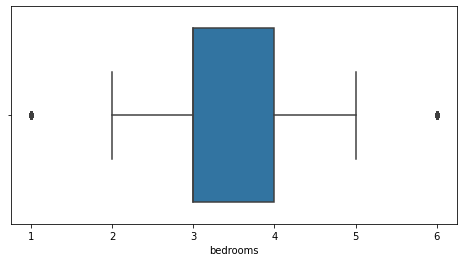

In [98]:
# Visualising bedroom spread after outlier treatment 
fig = plt.figure(figsize=(8,4))
sns.boxplot(x=data['bedrooms'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/bedroom_outlier_2.png')

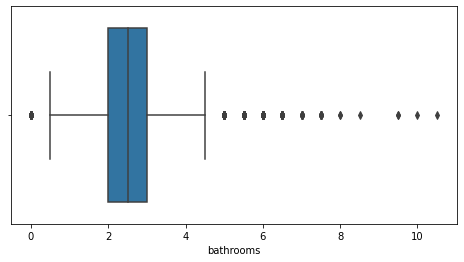

In [99]:
#visualising bathrooms spread
fig = plt.figure(figsize=(8,4))
sns.boxplot(x=data['bathrooms'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/bathroom_outlier.png')

In [100]:
# Detecting bathrooms outliers using IQR rule
Q1 = data['bathrooms'].quantile(0.25)
Q3 = data['bathrooms'].quantile(0.75)
IQR = Q3 - Q1
print("The Inter-quartile range for bathrooms spread is " + str(IQR))
print("Lower limit of bathrooms spread is " + str(Q1 - 1.5 * IQR))
print("Upper limit of bathrooms spread is " + str(Q3 + 1.5 * IQR  ))

The Inter-quartile range for bathrooms spread is 1.0
Lower limit of bathrooms spread is 0.5
Upper limit of bathrooms spread is 4.5


As shown above, I take the range of bedrooms to be between 1 and 5

In [101]:
# get descriptive statistics of bedrooms column
data['bedrooms'].describe()

count    30155.000000
mean         3.396916
std          0.928932
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max          6.000000
Name: bedrooms, dtype: float64

In [102]:
# get the mean of bedrooms without homes with more than 5  bathrooms
mean_bath_no_outliers = data.loc[(data['bathrooms'] < 6), 'bathrooms'].mean()
round(mean_bath_no_outliers,0)

2.0

In [103]:
# replace greater than 5 bathrooms with mean_bath_no_outliers
data['bathrooms'] = np.where((data['bathrooms'] > 5 ), round(mean_bath_no_outliers), data['bathrooms'])

In [104]:
# recheck the descriptive statistics of bathrooms column
data['bathrooms'].describe()

count    30155.000000
mean         2.307130
std          0.831919
min          0.000000
25%          2.000000
50%          2.500000
75%          3.000000
max          5.000000
Name: bathrooms, dtype: float64

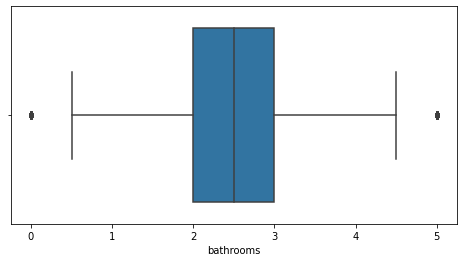

In [105]:
# Visualising bathrooms spread after outlier treament
fig = plt.figure(figsize=(8,4))
sns.boxplot(x=data['bathrooms'])
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/bathroom_outlier_2.png')

## Modeling

### Data Preparation

##### Check for multicolinearity

In [106]:
# generate copy of data without target variable (price), date, address and lat/lon to perform multicolinearity check
data_pred = data.drop(['date', 'price', 'address', 'lat', 'long'], axis=1)
data_pred.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated
0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0
1,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0
2,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0
3,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0
4,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0


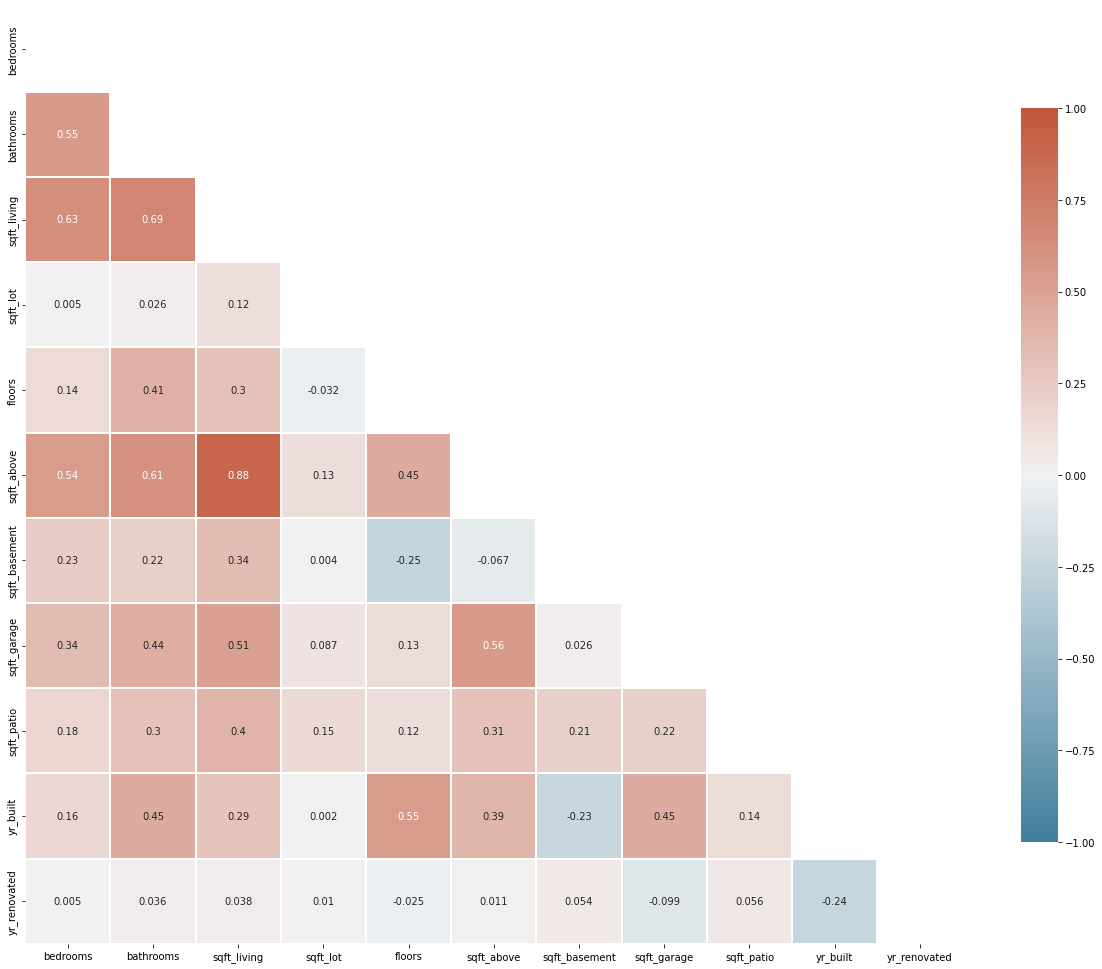

In [107]:
# check for multicolinearity with seaborn heatmap
# compute the correlation matrix
corr = round(data_pred.corr(), 3)

# generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# set up the matplotlib figure
fig, ax = plt.subplots(figsize=(21, 18))

# generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
ax = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, square=True, linewidths=1, cbar_kws={"shrink": .75}, annot=True)
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/multicolin_heatmap.png')

- Using .75 as a cutoff, there is high correlation between sqft_living and sqft_above as a result will probably only retain one of these.

##### Visually verifying check for multicollinearity

In [108]:
# save absolute value of correlation matrix as a data frame
# converts all values to absolute value
# stacks the row:column pairs into a multindex
# reset the index to set the multindex to seperate columns
# sort values. 0 is the column automatically generated by the stacking
corr_pred = data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
corr_pred['pairs'] = list(zip(corr_pred.level_0, corr_pred.level_1))

# set index to pairs
corr_pred.set_index(['pairs'], inplace=True)

#drop level columns
corr_pred.drop(columns=['level_0', 'level_1'], inplace=True)

# rename correlation column as cc rather than 0
corr_pred.columns = ['cc']

# drop duplicates
corr_pred.drop_duplicates(inplace=True)

In [109]:
# show correlation >.75 and below 1
corr_pred[(corr_pred.cc>.75) & (corr_pred.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.883984


Based on the multicollinearity checks, I have decided to work with sqft_living in lieu of sqft_above

#####Dealing with categorical variables

In [110]:
# converting categorical variables to category type
cat_vars = ['bedrooms','bathrooms','floors','waterfront','greenbelt', 'nuisance', 'view','condition','grade','heat_source', 'sewer_system']

for column in data[cat_vars]:
    data[cat_vars ] = data[cat_vars ].astype('category') 

##### Review relationship between Price and the categorical variables to guide the decision on which to include in the model.

In [136]:
#define a function to plot outputs
def plot_cat_vars(cat, var_dat):
  var = str(cat)
  var_dat = pd.concat([data['price'] / 100_000, data[var]], axis=1)
  fig, ax = plt.subplots(figsize=(8,4))
  fig = sns.boxplot(x=var, y='price', data=var_dat)
  plt.title(var.title() + ' and Price', fontsize=15, fontname='silom')
  plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/'+var+'_vs_price.png')


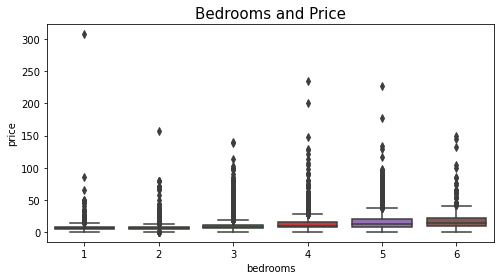

In [148]:
plot_cat_vars('bedrooms','bed_vs_price')



```
# Number of bedrooms seem to have a direct correlation to price, once it hits 6, it seems to taper off.
```



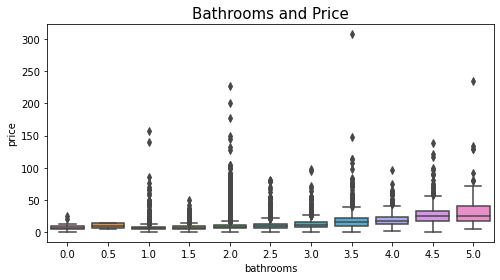

In [138]:
plot_cat_vars('bathrooms','bath_vs_price')



```
# Number of bathrooms seem to have a direct correlation to price as well, steadily climbs as number goes up.
```



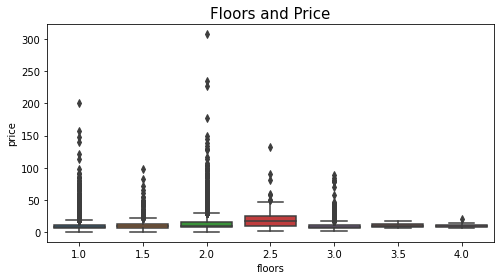

In [139]:
plot_cat_vars('floors','floor_vs_price')



```
# Price stability right around and after 2.5 floors which could mean 1st, 2nd floor and basement
```



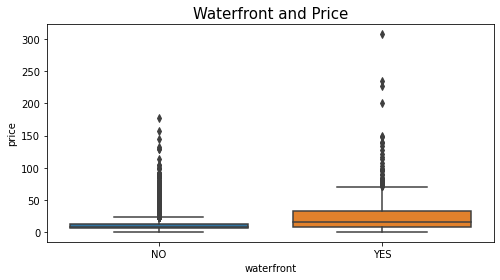

In [140]:
plot_cat_vars('waterfront','waterfront_vs_price')



```
# Waterfront house expetedly have a higher mean price
```



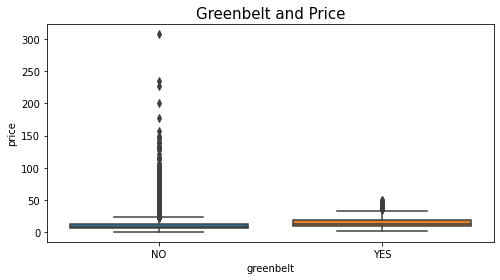

In [141]:
plot_cat_vars('greenbelt','greenbelt_vs_price')



```
# Although not a lot of houses are adjascent to a greenbelt, those that are have slightly higher mean price
```



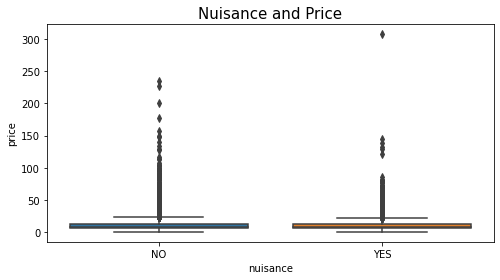

In [142]:
plot_cat_vars('nuisance','nuisance_vs_price')



```
# No nuisance indicates higher price
```



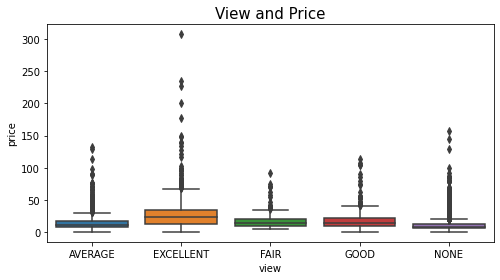

In [143]:
plot_cat_vars('view','view_vs_price')



```
# Although excllent view indicates higher price, however there are still some higher priced homes with 0 view, 
further analysis might required to consider that column as part of the model.
```



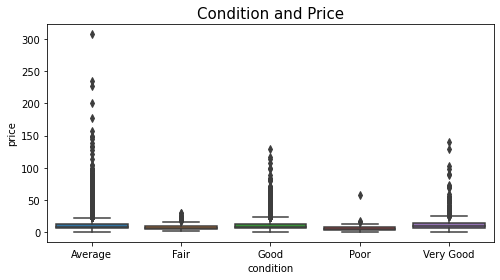

In [144]:
plot_cat_vars('condition','condition_vs_price')



```
# Average, Good and Very good condition have higher prices as expected
```



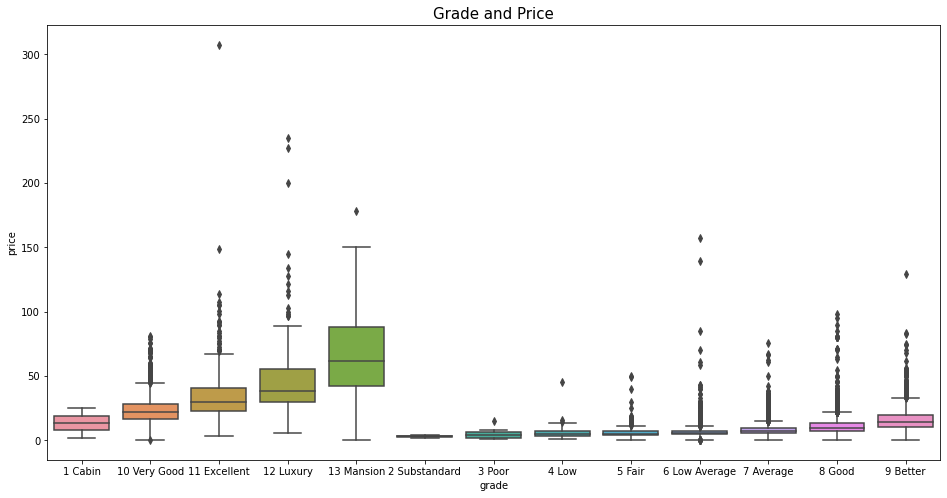

In [147]:
# grade vs price
var = 'grade'
grade_vs_price = pd.concat([data['price'] / 100_000, data[var]], axis=1)
fig, ax = plt.subplots(figsize=(16,8))
fig = sns.boxplot(x=var, y='price', data=grade_vs_price)
plt.title('Grade and Price', fontsize=15, fontname='silom')
plt.savefig('/content/drive/MyDrive/Colab Notebooks/images/grade_vs_price.png')



```
# As grades increases, mean price seems to increase as well
```



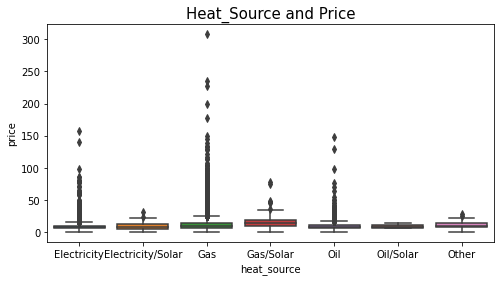

In [149]:
plot_cat_vars('heat_source','heat_source_vs_price')



```
# More houses have Gas as the heat source and also indicates higher prices, Gas/Solar combinationhowever has higher mean price
```



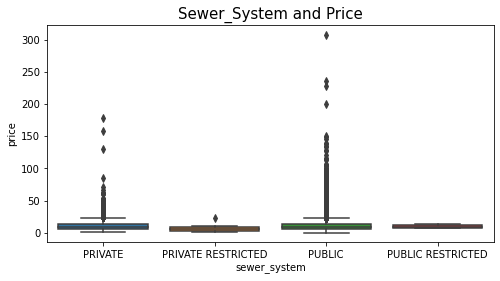

In [150]:
plot_cat_vars('sewer_system','sewer_system_vs_price')



```
# Public sewer system is dominant and comes with high prices.



#### Feature Engineering
- Getting age from years built and today to fine relationship with price
- Total lot space from living and lot sqft


### Baseline Model

### Model Iteration

### Final Model

## Regression Results

## Level Up: Project Enhancements

After completing the minimum project requirements, you could consider the following enhancements if you have time:

* Consider applying a linear or non-linear transformation to your features and/or target
* Investigate the linear regression assumptions for your final model
* Identify and remove outliers, then redo the analysis
* Compile the data cleaning code into a function

## Conclusion